<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Analyze-properties-of-the-interface-of-the-propagating-front-of-OsxGFP-positive-cells" data-toc-modified-id="Analyze-properties-of-the-interface-of-the-propagating-front-of-OsxGFP-positive-cells-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Analyze properties of the interface of the propagating front of OsxGFP positive cells</a></span><ul class="toc-item"><li><span><a href="#Load-image" data-toc-modified-id="Load-image-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Load image</a></span></li><li><span><a href="#Extract-interface-profile" data-toc-modified-id="Extract-interface-profile-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Extract interface profile</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Compare-interfaces:-(2)-obtained-from-different-thresholds" data-toc-modified-id="Compare-interfaces:-(2)-obtained-from-different-thresholds-1.2.0.1"><span class="toc-item-num">1.2.0.1&nbsp;&nbsp;</span>Compare interfaces: (2) obtained from different thresholds</a></span></li><li><span><a href="#Interface-widths" data-toc-modified-id="Interface-widths-1.2.0.2"><span class="toc-item-num">1.2.0.2&nbsp;&nbsp;</span>Interface widths</a></span></li></ul></li></ul></li><li><span><a href="#Calculate-fractal-dimension" data-toc-modified-id="Calculate-fractal-dimension-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Calculate fractal dimension</a></span></li><li><span><a href="#Scaling-analysis" data-toc-modified-id="Scaling-analysis-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Scaling analysis</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Literature" data-toc-modified-id="Literature-1.4.0.1"><span class="toc-item-num">1.4.0.1&nbsp;&nbsp;</span>Literature</a></span></li></ul></li><li><span><a href="#Validity-of-scaling-analysis" data-toc-modified-id="Validity-of-scaling-analysis-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Validity of scaling analysis</a></span><ul class="toc-item"><li><span><a href="#(1)-Family-Vicsek-scaling" data-toc-modified-id="(1)-Family-Vicsek-scaling-1.4.1.1"><span class="toc-item-num">1.4.1.1&nbsp;&nbsp;</span>(1) Family-Vicsek scaling</a></span></li><li><span><a href="#(2)-Fractal-dimension" data-toc-modified-id="(2)-Fractal-dimension-1.4.1.2"><span class="toc-item-num">1.4.1.2&nbsp;&nbsp;</span>(2) Fractal dimension</a></span></li></ul></li><li><span><a href="#Method-1:-calculate-exponent-$\alpha$-from-interface-width" data-toc-modified-id="Method-1:-calculate-exponent-$\alpha$-from-interface-width-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Method 1: calculate exponent $\alpha$ from interface width</a></span></li><li><span><a href="#Method-2:-calculate-exponent-$\alpha$-from-structure-factor" data-toc-modified-id="Method-2:-calculate-exponent-$\alpha$-from-structure-factor-1.4.3"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Method 2: calculate exponent $\alpha$ from structure factor</a></span></li><li><span><a href="#Fourier-definition" data-toc-modified-id="Fourier-definition-1.4.4"><span class="toc-item-num">1.4.4&nbsp;&nbsp;</span>Fourier definition</a></span><ul class="toc-item"><li><span><a href="#(I)-Fourier-space-length-scales" data-toc-modified-id="(I)-Fourier-space-length-scales-1.4.4.1"><span class="toc-item-num">1.4.4.1&nbsp;&nbsp;</span>(I) Fourier space length scales</a></span></li><li><span><a href="#(2)-Calculate-S(k)-for-single-image" data-toc-modified-id="(2)-Calculate-S(k)-for-single-image-1.4.4.2"><span class="toc-item-num">1.4.4.2&nbsp;&nbsp;</span>(2) Calculate S(k) for single image</a></span></li><li><span><a href="#Plot-for-different-thresholded-interfaces" data-toc-modified-id="Plot-for-different-thresholded-interfaces-1.4.4.3"><span class="toc-item-num">1.4.4.3&nbsp;&nbsp;</span>Plot for different thresholded interfaces</a></span></li></ul></li></ul></li></ul></li></ul></div>

# Analyze properties of the interface of the propagating front of OsxGFP positive cells

<b>Version control</b><br>
method 1: No overhang control. Use magic wand definitions or threshold definitions of interface. <br>
method 2 (current): overhang control. Use thresholded binary image, take largest contiguous region.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from pandas import DataFrame
from numpy import fft
import os
cwd = os.getcwd(); print("Working dir: " + cwd)
save_folder = os.path.split(cwd)[0] + "/Figures/"; print("Save plots in: " + save_folder)

Working dir: /Users/dang/Documents/TablerLab/Code
Save plots in: /Users/dang/Documents/TablerLab/Figures/


In [2]:
# Image settings
size = np.array([593.74, 758.12]); # total size of image in microns
pix_per_micron = 9.6355; # number of pixels per micron

In [ ]:
# Make plots interactive
%matplotlib notebook
# For 3D plots:
# %matplotlib widget

In [ ]:
# Make plots static 
%matplotlib inline

## Load image

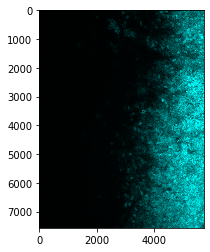

In [3]:
# Load image
im_path = "/Users/dang/Documents/TablerLab/Data_Adrian_270120/";
im_fname = "270120_mTmG_OsxCRE_FrontImaging_MaxIntensity_processed_YD_adjusted";
im_label_0 = "270120_mTmG_OsxCRE_";
im_label = "270120_mTmG_OsxCRE_thresholded_binary_largest_region"; # label for image, used for saving results
ext = ".tif";

img=mpimg.imread(im_path + im_fname + ext)
imgplot = plt.imshow(img)

## Extract interface profile
Numerically define the interface profile from microscope image data. <br>
We take the first coordinate at which the contiguous region is reached from the direction perpendicular to the interface. The result is that we can then define an interface height function $h(y,t)$.

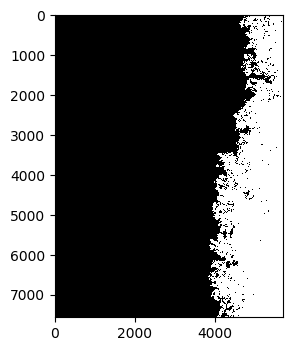

In [8]:
# Load Fiji data
data_path = "/Users/dang/Documents/Projects/Tabler_skull/Data_fixed_tissue/Data_Adrian_270120/Data_interfaces";
label_0 = "threshold_auto_binary_largest_region";
filename_in = "270120_Interface_processed_YD_threshold_6877_auto_binary_largest_region.txt";
fullname_in = data_path + filename_in;

#fullname_in = "/Users/dang/Documents/TablerLab/Data_Live_Imaging/190305 Live Imaging/Processed_TXT_data_interface/MaxProjected_Stitched_dataset(0-12hr)_YD_processed_interface_t1.txt";
#label_0 = "YD_processed_interface_t1";

data_image = pd.read_csv(fullname_in, header = None, delimiter='\t');
data_image[data_image == 255] = 1; # convert to 0/1

# Store data shape
Lx = data_image.shape[1];
Ly = data_image.shape[0];

# Show loaded figure
plt.figure(dpi=100);
plt.imshow(data_image, cmap='gray', vmin=0, vmax=1)
plt.show()

In [66]:
# flip x-axis?
reverse = 0;    

# Define interface (same as above)
if reverse:
    data_image_rev = np.empty(data_image.shape);
    for i in np.arange(0, data_image.shape[0]):
        # print(i)
        data_image_rev[i] = data_image.iloc[i][::-1];
    interface = np.array(data_image_rev.argmax(axis=1), dtype=float); # find (first) index of max. of data frame
else:
    interface = np.array(data_image.idxmax(axis=1), dtype=float); # find (first) index of max. of data frame
    interface = Lx - interface; # invert height if bone at right 

# Check that none of the rows has only 0 or 1:
if len(interface[interface == 0])==0:
    print("No empty/full rows")
else:
    print("Empty/full rows detected!") 
    # post-processing: delete empty/full rows
    mask = np.array(interface == 0, dtype=bool);
    interface[mask] = np.nan; # remove bad rows

# flip back x-axis
interface = Lx - interface; 

# save for later use
interface_0 = interface; 

No empty/full rows


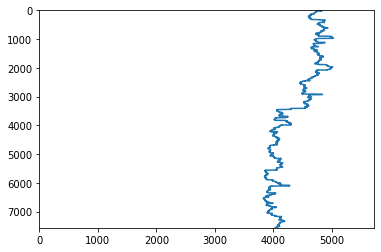

In [67]:
# Plot interface
plt.figure();
plt.plot(interface, y_vals)
plt.xlim(0, Lx)
plt.ylim(0, Ly)
plt.gca().invert_yaxis()

# Save image
fname_out = save_folder + im_label_0 + label_0 + "_interface";
ext = ".png";
#plt.savefig(fname_out + ext)

#### Compare interfaces: (2) obtained from different thresholds
16-bit images: intensity values in range 0-65535. Lower thresholds for cutting off very dark regions.

In [13]:
thresholds_all = np.array([2000, 3000, 4000, 5000]);
data_path = "/Users/dang/Documents/TablerLab/Data_Adrian_270120/Data_interfaces/";

interfaces_all = []; # store interface data
for idx in np.arange(len(thresholds_all)):
    threshold = thresholds_all[idx];
    fname_in = "270120_Interface_processed_YD_threshold_" + str(threshold) + "_binary_largest_region"
    ext = '.txt';
    
    data_image = pd.read_csv(data_path + fname_in + ext, header = None, delimiter='\t');
    data_image[data_image == 255] = 1; # convert to 0/1
    
    # Define interface (same as above)
    if reverse:
        data_image_rev = np.empty(data_image.shape);
        for i in np.arange(0, data_image.shape[0]):
            # print(i)
            data_image_rev[i] = data_image.iloc[i][::-1];
        interface = np.array(data_image_rev.argmax(axis=1), dtype=float); # find (first) index of max. of data frame
    else:
        interface = np.array(data_image.idxmax(axis=1), dtype=float); # find (first) index of max. of data frame
        interface = Lx - interface; # invert height if bone at right 

    # Check that none of the rows has only 0 or 1:
    if len(interface[interface == 0])==0:
        print("No empty/full rows")
    else:
        print("Empty/full rows detected!") 
        # post-processing: delete empty/full rows
        mask = np.array(interface == 0, dtype=bool);
        interface[mask] = np.nan; # remove bad rows
    
    # flip back x-axis
    interface = Lx - interface; 
    
    interfaces_all.append(interface);

No empty/full rows
No empty/full rows
No empty/full rows
No empty/full rows


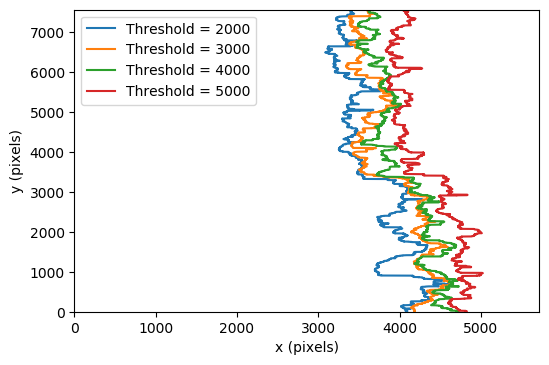

In [14]:
#Plot all interfaces together
y_vals = np.arange(0, Ly);

h = plt.figure(dpi = 100);
for idx in np.arange(len(thresholds_all)):
    this_label = "Threshold = " + str(thresholds_all[idx]);
    plt.plot(interfaces_all[idx], y_vals, label=this_label);
plt.xlabel('x (pixels)')
plt.ylabel('y (pixels)')
plt.xlim(0, Lx)
plt.ylim(0, Ly)
plt.legend()

# Save image
fname_out = save_folder + im_label + "interface_profile_all_samples";
ext = ".png";
# plt.savefig(fname_out + ext)

plt.show()

#### Interface widths
The interface width is <br>
$w(t) := \sqrt{\langle h^2\rangle - \langle h \rangle^2} = \left[ \frac{1}{L} \int_{0}^{L} dx \left( h(x,t) - \bar{h}(t) \right)^2 \right]^{1/2} $


In [15]:
# Do for all thresholds
for idx in np.arange(len(thresholds_all)):
    print("Threshold = " + str(thresholds_all[idx]));
    width = np.std(interfaces_all[idx]);
    print('Interface width = ' + str(round(width/pix_per_micron, 2)) + ' microns')

Threshold = 2000
Interface width = 39.3 microns
Threshold = 3000
Interface width = 39.67 microns
Threshold = 4000
Interface width = 36.66 microns
Threshold = 5000
Interface width = 37.57 microns


## Calculate fractal dimension

Box-counting method

## Scaling analysis
We calculate the scaling exponents of the interface, to determine its universality class. There are different ways of obtaining the scaling exponents of an interface. Before that, we first verify that interface satisfies Family-Vicsek scaling, required for the scaling exponents to make sense.

#### Literature
<u>Books</u><br>
Barabasi & Stanley, Fractal Concepts in Surface Growth, 1995 <br>

<u>More recent papers</u><br>
Bacterial colonies: <a href="https://www.sciencedirect.com/science/article/pii/037843719090116A?via%3Dihub">Vicsek et al., 1990</a> (free growth), <a href="https://doi.org/10.1073/pnas.0710150104 ">Hallatschek et al., 2007</a> (competition) <br>
Tumour growth: <a href="https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.81.4008">Bru et al., PRL 1998</a> (rat brain tumours), <a href="https://www.sciencedirect.com/science/article/pii/S0006349503747158?via%3Dihub">Bru et al., Biophysical J. 2003</a> (15 cell lines, 16 tumour types), <a href="https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.99.248101#">Block et al., PRL 2007</a> (cellular automaton model) <br>
Cell colonies: <a href="https://journals.aps.org/pre/abstract/10.1103/PhysRevE.82.031903">Huergo et al. (2010) </a> (Velo cells),  <a href="dx.doi.org/10.1088/1367-2630/18/8/083020">Podewitz et al., New J. Phys. (2016)</a> (individual-based model)<br>


### Validity of scaling analysis

For the scaling arguments to work, the system needs to satisfy either of two conditions below.

#### (1) Family-Vicsek scaling
the Family-Viscek relation: <br>
$\hspace{1cm} w(L,t) \sim L^{\alpha} f\left(\frac{t}{L^z}\right)$ 

#### (2) Fractal dimension
Alternatively, Bru et al. (2003) say that it is sufficient to check that the interface is fractal, by calculating the fractal dimensions and showing that it's a non-integer number.

### Method 1: calculate exponent $\alpha$ from interface width
First, we can define a length-scale-dependent interface width <br>
$\hspace{1cm} w(l, t)^2 =  \left\langle \frac{1}{l}  \sum_{h_i \in l} \left[ h_i(t) - \langle h_i \rangle_l \right]^2  \right\rangle_L$ <br>

This quantity is proposed to have scaling relations <br>
$\hspace{1cm} w(l, t) \propto \begin{cases} t^{\beta} & \text{if } t \ll t_s \\ l^{\alpha} & \text{if } t \gg t_s \end{cases} $ <br>

Hence, we obtain 
<ol>
    <li>$\alpha$ from the long-time scaling with $l$.</li>
    <li>$\beta$ from the short-time scaling with $t$. However, this only works if we have data from the initial phase before the width saturates. </li>
    <li>$z$ from the relation $z = \alpha/\beta$ (if we have $\beta$), or from the Family-Vicsek scaling, by plotting $w(l,t)/l^{\alpha}$ against $\frac{t}{l^z}$. For the correct values of $\alpha$ and $z$, the curves for different $l$ should collapse onto one curve. </li>
</ol>

In [228]:
# analyze performance
import time
import functools

def calc_local_width_fix_data(l):
    var_all = [np.var(interface_0[i:i+l]) for i in range(len(interface_0)-l)];
    return np.mean(var_all)**0.5

def calc_local_width(data, l):
    var_all = [np.var(data[i:i+l]) for i in range(len(data)-l)];
    return np.mean(var_all)**0.5

def calc_local_width_2(data, l):
    var_all = np.zeros(len(data)) ;
    for i in range(len(data)-l): 
        var_all[i] = np.var(data[i:i+l]);
    return np.mean(var_all)**0.5

times=10000;

start_time = time.time()
for i in range(times):
    x=np.sqrt(1.295718204);
#[calc_local_width(interface_0, l) for l in [10, 100, 1000]];
print("--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
for i in range(times):
    x=1.295718204**0.5;
#print([calc_local_width_2(interface_0, l) for l in [10, 100, 1000]])
print("--- %s seconds ---" % (time.time() - start_time))

start_time = time.time()
print(map( calc_local_width_fix_data, [10, 100, 1000] ))
print("--- %s seconds ---" % (time.time() - start_time))

# print(time1);
# print(time2)

--- 0.009093999862670898 seconds ---
--- 0.0005950927734375 seconds ---
--- 0.00010514259338378906 seconds ---


In [230]:
# calculate local width as function of l
def calc_local_width(data, l):
    var_all = [np.var(data[i:i+l]) for i in range(len(data)-l)];
    return np.mean(var_all)**0.5

l_list = np.arange(1, len(interface_0)+1); 
#l_list = np.array([1, 10, 100, 1000]);
local_widths_all = [calc_local_width(interface_0, l) for l in l_list];

# Save w(l, t) data 
local_widths_all_df = pd.DataFrame(data=local_widths_all_df, columns=["w(l,t)"])

#save_folder = '';
fname = im_label_0 + label_0 + 'local_widths_all';
#local_widths_all_df.to_csv(path_or_buf=save_folder+fname)

In [251]:
# load saved local widths
subfolder = 'interfaces_fixed_tissue_binary_no_overhang/'
fname = im_label_0 + label_0 + '_local_widths_all';
#local_widths_all_df = pd.read_csv(save_folder + subfolder + fname)
local_widths_all = pd.read_csv(save_folder + subfolder + fname)["w(l,t)"];

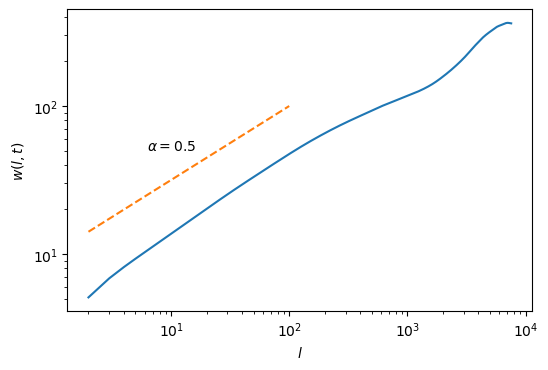

In [256]:
# Plot w(l, t) against l
plt.figure(dpi=100);
plt.plot(l_list[1:], local_widths_all[1:])
l_sel = np.array([2, 10**2]);
c=10; alpha=0.5;
plt.plot(l_sel, c*l_sel**alpha, '--')
plt.text(10**(0.8), 10**1.7, '$\\alpha = $' + str(alpha) )
plt.xlabel('$l$');
plt.ylabel('$w(l,t)$')
plt.xscale('log');
plt.yscale('log');

# Save image
fname_out = save_folder + im_label_0 + label_0 + "_local_widths_log_log";
ext = ".pdf";
#plt.savefig(fname_out + ext)

plt.show()

### Method 2: calculate exponent $\alpha$ from structure factor
We can also the scaling exponents from the dynamic structure factor <br>
$\hspace{1cm} S(k, t) = \langle \tilde{h}(k, t) \tilde{h}(-k, t) \rangle = k^{-(2\alpha + 1)} \tilde{s}(k t^{1/z}),$ <br>
$\hspace{1cm} \tilde{s}(u = kt^{1/z}) = \begin{cases} u^{-(2\alpha+1)} &\text{if } u \ll 1 \\ \text{const.} &\text{if } u \gg 1 \end{cases} $ <br> 

Here $\tilde{h}(k, t)$ denotes the Fourier transform of the interface height function $h(y, t)$ and $\langle \ldots \rangle$ the average over many instances (i.e. images). <br>

Obtain $\alpha$: <br>
For sufficiently large $k$, or at sufficiently large times $t$, $S(k, t)$ should scale as a power law and we can obtain the roughness coefficient $\alpha$ from this power law. <br>
 

### Fourier definition

#### (I) Fourier space length scales
Relate $k$ to real length scale. For FFT, the decomposition is made up of waves of the form $e^{-i 2\pi k n/N}$. 
The length scale (i.e. period of mode $k$) in the discrete set of values is then $N/k$. <br>
The real distance between two values $L/N$. <br>
The length scale associated with mode $k$ in real space is then $N/k * L/N = L/k$, where $L$ is the total length of the system.
<br>
So for a given scale $a$, $k = L/a$.

Check definition, $k$ values do not correspond to typical values in other papers.

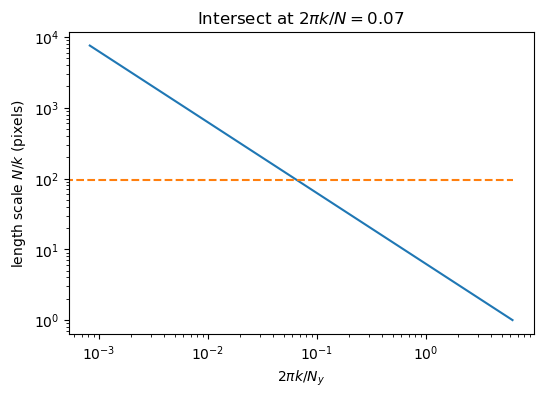

In [35]:
k_all = 2*np.pi*np.arange(1, Ly)/Ly; # normalized 0 <= k <= 2*pi
lengths_all = Ly/np.arange(1, Ly);
cell_size = 10*pix_per_micron; # cell size in pixels, real size is approx. 10 microns
k_cell_norm = 2*np.pi/cell_size; # k-value corresponding to cell size, normalized to 2pi*k/Ly

plt.figure(dpi=100)
plt.plot( k_all, lengths_all )
plt.plot( np.array([0, 2*np.pi]), np.array([cell_size, cell_size]), '--' )
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$2\pi k/N_y$') # N_y: number of pixels in y-direction
plt.ylabel('length scale $N/k$ (pixels)')

plt.title('Intersect at $2\pi k/N = $' + str(round(k_cell_norm, 2)) )
plt.show()

Hence, only first part of structure function counts. Verified by back-of-envelope calculation for "270120" image: <br>
Image has roughly 8000 pixels, and 10 pixel/micron. Cells are around 10 microns in diameter, so 100 pixels. Wave mode corresponding to 100 pixels then has $k = 8000/100 = 80$. Hence all $k > 80$ is irrelevant.

#### (2) Calculate S(k) for single image

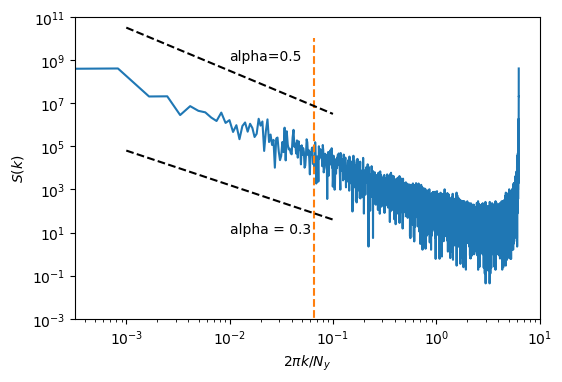

In [64]:
# Calculate for single image
h_all = interface;
k_all = 2*np.pi*np.arange(Ly)/Ly; # normalized 0 <= k <= 2*pi
S_all = fft.fft(h_all)*fft.ifft(h_all); # h(-k) obtained from inverse FFT

# subtract mean (no change to result except k=0 mode vanishes)
#h_temp = h_all - np.mean(h_all)
#S_all = fft.fft(h_temp)*fft.ifft(h_temp); # h(-k) obtained from inverse FFT

plt.figure(dpi=100)

# Plot dynamic structure factor S(k)
plt.plot(k_all, S_all)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$2\pi k/N_y$')
plt.ylabel('$S(k)$')

# Plot wave mode cut-off
plt.plot([k_cell_norm, k_cell_norm], [10**(-5), 10**10], '--')
plt.xlim(10**(-3.5),10**1)
plt.ylim(10**(-3), 10**11)

# Plot power laws 
k_range = np.array([10**(-3), 10**(-1)]);

exponent = -1.6;
c = (10**0);
S_range = c*k_range**exponent;
plt.plot(k_range, S_range, 'k--')
#plt.text(10**(1), 10**(1), 'slope = ' + str(exponent) )
plt.text(10**(-2), 10**(1), 'alpha = ' + str( round(-(exponent+1)/2, 3) ) )

exponent2 = -2;
c2 = (10**4.5)
S_range2 = c2*k_range**exponent2;
plt.plot(k_range, S_range2, 'k--')
#plt.text(10**(1), 10**8, 'slope=' + str( exponent2 ) )
plt.text(10**(-2), 10**9, 'alpha=' + str( round(-(exponent2+1)/2, 3) ) )

# Save image
fname_out = save_folder + im_label_0 + label_0 + "_structure_factor";
ext = ".png";
# plt.savefig(fname_out + ext)

plt.show()

The slope of the above function equals $- (2 \alpha + 1)$, so we get $\alpha = -(1+\text{slope})/2$. <br> 

For a slope of $-2$ we get $\alpha = 0.5$. <b> This is precisely the value corresponding to KPZ!</b> Need to check other exponents as well.

<b>Note</b>: Result is very noisy because we are taking a single snapshot. 

#### Plot for different thresholded interfaces

<Figure size 900x600 with 0 Axes>

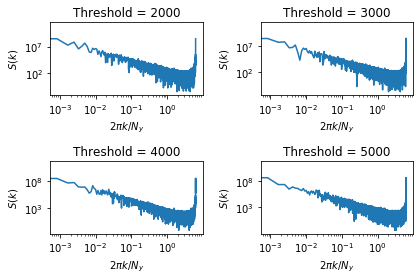

In [41]:
plt.figure(dpi=150)
fig, axes = plt.subplots(ncols=2, nrows=2) # Tune manually
for idx in np.arange(len(thresholds_all)):
    h_all = interfaces_all[idx];
    this_S_all = fft.fft(h_all)*fft.ifft(h_all); # h(-k) obtained from inverse FFT
    this_label = "Threshold = " + str(thresholds_all[idx]);    
    
    (x,y) = divmod(idx+1, 2)
    plt.subplot(2, 2, idx+1)
    plt.plot(k_all, this_S_all, label=this_label)  
    plt.title(this_label)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('$2\pi k/N_y$')
    plt.ylabel('$S(k)$')  
    
fig.tight_layout()

# Save image
fname_out = save_folder + im_label + "structure_factor_all";
ext = ".pdf";
# plt.savefig(fname_out + ext)

plt.show()

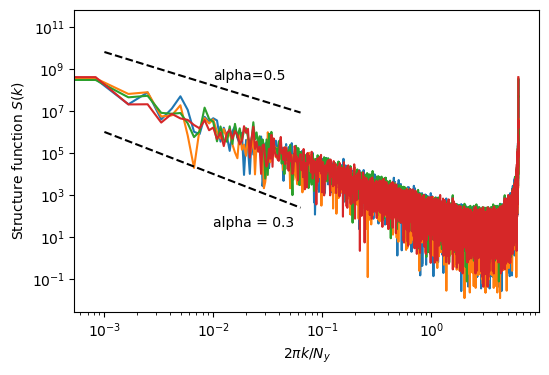

In [50]:
plt.figure(dpi=100)
for idx in np.arange(len(thresholds_all)):
    h_all = interfaces_all[idx];
    this_S_all = fft.fft(h_all)*fft.ifft(h_all); # h(-k) obtained from inverse FFT
    this_label = "Threshold = " + str(thresholds_all[idx]);    
    plt.plot(k_all, this_S_all, label=this_label)  
    
# Plot power laws 
k_range = 10**np.arange(-3, -1, 0.2);

exponent = -1.6;
c = (10**5);
S_range = c*k_range**exponent;
plt.plot(k_range, S_range, 'k--')
# plt.text(10**(1), 10**(2.5), 'slope = ' + str(exponent) )
plt.text(10**(-2), 10**(1.5), 'alpha = ' + str( round(-(exponent+1)/2, 3) ) )

exponent2 = -2;
c2 = (10**0)
S_range2 = c2*k_range**exponent2;
plt.plot(k_range, S_range2, 'k--')
# plt.text(10**(1), 10**8, 'slope=' + str( exponent2 ) )
plt.text(10**(-2), 10**8.5, 'alpha=' + str( round(-(exponent2+1)/2, 3) ) )

plt.xscale('log')
plt.yscale('log')
#plt.title('Structure function from 1 image')
plt.xlabel('$2\pi k/N_y$')
plt.ylabel('Structure function $S(k)$')
#plt.legend()

# Save image
fname_out = save_folder + im_label + "structure_factor_all_together";
ext = ".png";
#plt.savefig(fname_out + ext)

plt.show()